# IMDB电影数据分析

本项目来源于kaggle的练习项目
https://www.kaggle.com/tmdb/tmdb-movie-metadata

# 一、提出问题



1.每年上映电影数量与票房是多少？

2.电影类型如何随着时间的推移而发生变化？

3.Universal Pictures 和 Paramount Pictures 之间的对比情况如何？ 

4.电影的票房及评分与哪些因素相关？

# 二、理解数据

## 2.1 导入数据集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import Counter
from operator import itemgetter
from wordcloud import WordCloud
# 导入电影信息数据集
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [2]:
# 查看credits
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
# 查看moveis
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
# 合并两个数据集
del credits['title']
df = pd.concat([credits, movies], axis=1)
# 去除重复列
df.drop_duplicates(inplace=True)

In [5]:
# 查看每一列
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
movie_id                4803 non-null int64
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null ob

In [6]:
# 将releadse_date数据类型转化成datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
movie_id                4803 non-null int64
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null datetime64[ns]
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non

## 2.1 选择子集

In [7]:
# 将电影发行日期作为索引
df.index = df['release_date']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4803 entries, 2009-12-10 to 2005-08-05
Data columns (total 23 columns):
movie_id                4803 non-null int64
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null datetime64[ns]
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline       

In [8]:
# 删除重复的release_date列
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4803 entries, 2009-12-10 to 2005-08-05
Data columns (total 23 columns):
movie_id                4803 non-null int64
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null datetime64[ns]
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline       

In [9]:
# 描述df数据集
df.describe()

,movie_id,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## 2.2 缺失值与异常值处理

### (1)缺失值处理

In [10]:
'''
比较重要的几列如索引(发行时间)、电影时长分别存在一个和二个缺失值；此外预算、票房、电影时长、受欢迎程度、评分、评分次数均存在异常值（值为0）
因此需要对df数据集进行处理
'''
# 对电影时长缺失值用均值进行处理
df['runtime'].fillna(df['runtime'].mean(), inplace=True)
# 查看索引缺失值位置
df[df.index.isnull()]

,movie_id,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
NaT,380097,[],[],0,[],NaN,380097,[],en,America Is Still the Place,...,[],NaT,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [11]:
# 删除索引缺失的一行
df.drop('NaT', axis=0, inplace=True)
df[df.index.isnull()]

,movie_id,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,


### （2）异常值处理

In [12]:
# 对预算、票房、电影时长、受欢迎程度、评分、评分次数中为0的数值用平均值替代
df['budget'].replace(0, df['budget'].mean(), inplace=True)
df['revenue'].replace(0, df['revenue'].mean(), inplace=True)
df['runtime'].replace(0, df['runtime'].mean(), inplace=True)
df['popularity'].replace(0, df['popularity'].mean(), inplace=True)
df['vote_average'].replace(0, df['vote_average'].mean(), inplace=True)
df['vote_count'].replace(0, df['vote_count'].mean(), inplace=True)
df.describe()

,movie_id,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000
mean,57098.234902,3.531867e+07,57098.234902,21.496776,1.067109e+08,107.654995,6.172114,699.131417
std,88581.302370,3.790876e+07,88581.302370,31.818451,1.546568e+08,20.671588,0.966424,1232.188339
min,5.000000,1.000000e+00,5.000000,0.000372,5.000000e+00,14.000000,0.500000,1.000000
25%,9013.750000,1.200000e+07,9013.750000,4.671734,2.760502e+07,94.000000,5.600000,59.000000
50%,14626.500000,2.905109e+07,14626.500000,12.924931,8.227777e+07,104.000000,6.200000,250.000000
75%,58589.750000,4.000000e+07,58589.750000,28.332017,9.291920e+07,117.750000,6.800000,737.000000
max,459488.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [13]:
# 按时间排序
df.sort_index(ascending=True, inplace=True)
df.head(3)

,movie_id,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1916-09-04,3059,"[{""cast_id"": 23, ""character"": ""The Woman Who R...","[{""credit_id"": ""577fe3e79251415db5000bf2"", ""de...",385907.0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,3059,"[{""id"": 279, ""name"": ""usa""}, {""id"": 2487, ""nam...",en,Intolerance,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1916-09-04,8394751.0,197.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60.0
1925-11-05,3060,"[{""cast_id"": 23, ""character"": ""James Apperson""...","[{""credit_id"": ""52fe4381c3a36847f805922b"", ""de...",245000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,3060,"[{""id"": 2504, ""name"": ""world war i""}, {""id"": 1...",en,The Big Parade,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1925-11-05,22000000.0,151.0,[],Released,NaN,The Big Parade,7.0,21.0
1927-01-10,19,"[{""cast_id"": 10, ""character"": ""Maria"", ""credit...","[{""credit_id"": ""52fe420fc3a36847f8000c55"", ""de...",92620000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,19,"[{""id"": 312, ""name"": ""man vs machine""}, {""id"":...",de,Metropolis,...,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",1927-01-10,650422.0,153.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657.0


# 三、每年上映电影数量变化

In [14]:
# 统计每年上映的电影数量
movies_year = df.groupby(['release_date'])['id'].count()
movies_year = movies_year.resample('Y').sum()

F:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'release_date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  


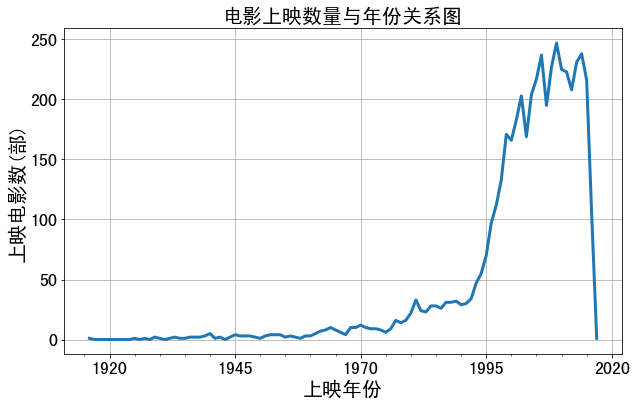

In [15]:
# 制作每年上映的电影数量与年份关系图
movies_year.plot(x='release_date', linewidth=3 ,figsize=(10,6), fontsize=18)
plt.xlabel('上映年份', fontsize=20)
plt.ylabel('上映电影数(部)', fontsize=20)
plt.title('电影上映数量与年份关系图', fontsize=20)
plt.grid(True)
plt.show()

# 四、电影类型如何随年代而发生变化

In [16]:
# 将所有电影类型提取出来
# 定义一个空列表genres来装类型
genres = []
for i in range(len(df['genres'])):
    column = json.loads(df['genres'][i])
    for s in range(len(column)):
        genre = column[s]['name']
        genres.append(genre)
genres[:5]

['Drama', 'Comedy', 'Thriller', 'Music', 'Romance']

In [17]:
# 去除重复元素
genres = list(set(genres))
genres

['Documentary',
 'Comedy',
 'Music',
 'Science Fiction',
 'Action',
 'Drama',
 'Romance',
 'Mystery',
 'Western',
 'Horror',
 'TV Movie',
 'Crime',
 'War',
 'Fantasy',
 'Thriller',
 'Foreign',
 'Family',
 'History',
 'Animation',
 'Adventure']

In [18]:
# 创建一个包含电影类型，且以发行时间为索引的数据集
index = df.index
genres_year = pd.DataFrame(index=index, columns=genres)
# 用0来填充NaN
genres_year.fillna(0, inplace=True)
genres_year.head()

,Documentary,Comedy,Music,Science Fiction,Action,Drama,Romance,Mystery,Western,Horror,TV Movie,Crime,War,Fantasy,Thriller,Foreign,Family,History,Animation,Adventure
release_date,,,,,,,,,,,,,,,,,,,,
1916-09-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1925-11-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1927-01-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1929-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1929-02-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# 在genres_year数据集中添加数据
for m in range(len(df)):
    genres_j = json.loads(df['genres'][m])
    for n in range(len(genres_j)):
        word = genres_j[n]['name']
        genres_year.loc[genres_year.index[m], word] += 1
genres_year.head()

,Documentary,Comedy,Music,Science Fiction,Action,Drama,Romance,Mystery,Western,Horror,TV Movie,Crime,War,Fantasy,Thriller,Foreign,Family,History,Animation,Adventure
release_date,,,,,,,,,,,,,,,,,,,,
1916-09-04,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1925-11-05,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1927-01-10,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1929-01-30,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1929-02-08,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# 将索引转为为年的日期形式
genres_year = genres_year.resample('Y').sum().to_period('Y')
genres_year.head()

,Documentary,Comedy,Music,Science Fiction,Action,Drama,Romance,Mystery,Western,Horror,TV Movie,Crime,War,Fantasy,Thriller,Foreign,Family,History,Animation,Adventure
release_date,,,,,,,,,,,,,,,,,,,,
1916,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# 将不同类型电影按数量排序，除前十名外，其余统称为others
gdict = dict(genres_year.sum())
gdict = sorted(gdict.items(), key=lambda item:item[1], reverse=True)
gdict = dict(gdict[:10])
gdict['others'] = genres_year.sum().sort_index()[10:].sum()

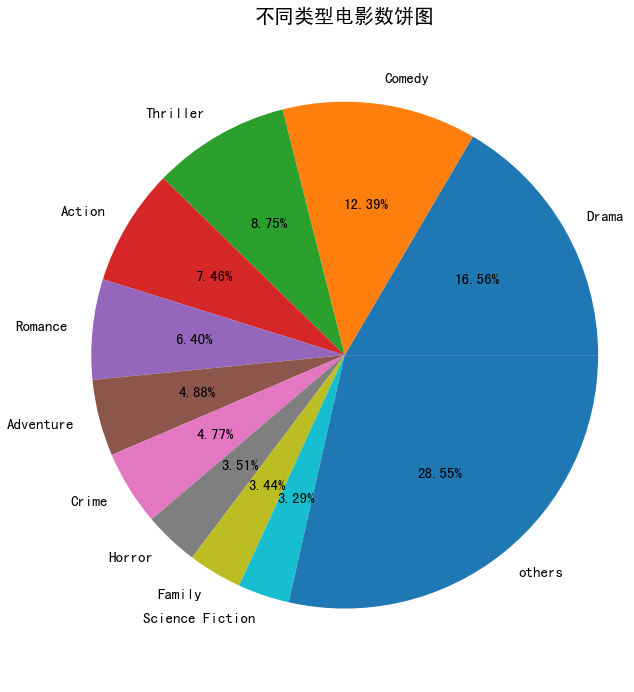

In [22]:
# 绘制不同类型电影数量图
# 定义饼图的大小
plt.figure(figsize=(10, 12))
size = gdict.values()
labels = gdict.keys()
plt.pie(size, labels=labels, autopct = '%3.2f%%',startangle=0, textprops={'fontsize':15,'color':'black'})
plt.axis('equal')
plt.title('不同类型电影数饼图', fontsize=20)
plt.show()

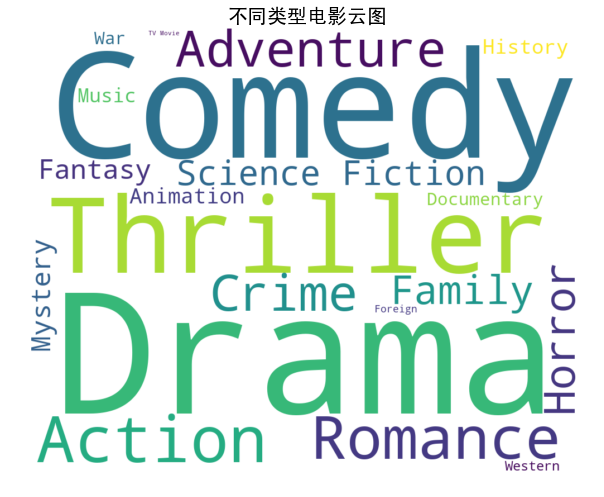

In [23]:
# 用云图展示
wc = WordCloud(background_color='white', width=1000, height=800, margin=2).generate_from_frequencies(dict(genres_year.sum()))
plt.figure(figsize=(10,15))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title('不同类型电影云图', fontsize=20)
plt.show()

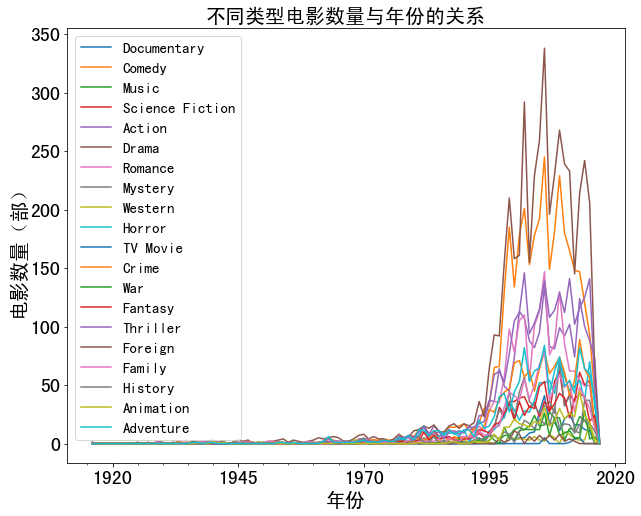

In [24]:
# 绘制电影类型随年代变化图
genres_year.plot(figsize=(10, 8), fontsize=20)
plt.xlabel('年份', fontsize=20)
plt.ylabel('电影数量（部）', fontsize=20)
plt.legend(loc=2, fontsize=15)
plt.title('不同类型电影数量与年份的关系', fontsize=20)
plt.show()

# 五、Universal Pictures 和 Paramount Pictures 情况对比

In [25]:
# 选择新的子集来存放包含两家公司的重要信息
UPdf = pd.concat([df['production_companies'], df['budget'], df['popularity'], 
                  df['revenue'], df['runtime'], df['vote_average'], df['vote_count']], axis=1)
UPdf.set_index(np.arange(len(UPdf)), inplace=True)
UPdf['release_date'] = df.index
UPdf.head()

,production_companies,budget,popularity,revenue,runtime,vote_average,vote_count,release_date
0,"[{""name"": ""Triangle Film Corporation"", ""id"": 1...",3.859070e+05,3.232447,8.394751e+06,197.0,7.4,60.0,1916-09-04
1,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...",2.450000e+05,0.785744,2.200000e+07,151.0,7.0,21.0,1925-11-05
2,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",9.262000e+07,32.351527,6.504220e+05,153.0,8.0,657.0,1927-01-10
3,"[{""name"": ""Nero Films"", ""id"": 4903}]",2.905109e+07,1.824184,8.227777e+07,109.0,7.6,45.0,1929-01-30
4,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...",3.790000e+05,0.968865,4.358000e+06,100.0,5.0,19.0,1929-02-08


In [26]:
# 从UPdf中提取出仅包含U公司信息的Udf子集
Udf = []
Ucompany = {"name": "Universal Pictures", "id": 33}
columns = ['production_companies', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_date']
for i in range(len(UPdf)):
    companies = eval(UPdf.loc[i,'production_companies'])
    for s in range(len(companies)):
        if Ucompany in companies:
            Udf.append(list(UPdf.loc[i, :]))
Udf = pd.DataFrame(Udf, columns=columns)
Udf['production_companies'] = 'Universal Pictures'
Udf.drop_duplicates(inplace=True)

In [27]:
# 从UPdf中提取出仅包含P公司信息的Udf子集
Pdf = []
Pcompany = {"name": "Paramount Pictures", "id": 4}
columns = ['production_companies', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_date']
for i in range(len(UPdf)):
    companies = eval(UPdf.loc[i,'production_companies'])
    for s in range(len(companies)):
        if Pcompany in companies:
            Pdf.append(list(UPdf.loc[i, :]))
Pdf = pd.DataFrame(Pdf, columns=columns)
Pdf['production_companies'] = 'Paramount Pictures '
Pdf.drop_duplicates(inplace=True)

In [28]:
# 查看U公司数据集
Udf.head()

,production_companies,budget,popularity,revenue,runtime,vote_average,vote_count,release_date
0,Universal Pictures,806948.0,93.067866,32000000.0,109.0,8.2,2320.0,1960-06-16
3,Universal Pictures,2000000.0,22.139842,13129846.0,129.0,8.0,657.0,1962-12-25
4,Universal Pictures,3000000.0,7.924982,13000000.0,128.0,6.4,120.0,1966-07-13
5,Universal Pictures,8000000.0,0.709143,20000000.0,149.0,6.5,15.0,1969-01-01
6,Universal Pictures,4000000.0,5.975604,6000000.0,143.0,6.1,77.0,1969-12-18


In [29]:
# 查看P公司数据集
Pdf.head()

,production_companies,budget,popularity,revenue,runtime,vote_average,vote_count,release_date
0,Paramount Pictures,92620000.0,32.351527,650422.0,153.0,8.0,657.0,1927-01-10
2,Paramount Pictures,4.0,1.199451,25.0,89.0,6.2,28.0,1932-12-08
3,Paramount Pictures,200000.0,0.622752,2200000.0,66.0,5.1,27.0,1933-02-09
4,Paramount Pictures,4000000.0,8.988455,36000000.0,152.0,6.6,50.0,1952-01-10
5,Paramount Pictures,1200000.0,6.920873,7000000.0,99.0,6.9,149.0,1955-10-03


In [30]:
Udf.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.110000e+02,311.000000,3.110000e+02,311.00000,311.000000,311.000000
mean,4.594498e+07,31.468230,1.462000e+08,112.77492,6.274277,1017.758842
std,3.835680e+07,53.193539,1.759419e+08,19.97032,0.818130,1188.778290
min,2.500000e+01,0.518056,1.300000e+01,69.00000,3.500000,1.000000
25%,2.000000e+07,12.196666,4.812707e+07,98.50000,5.800000,217.000000
50%,3.500000e+07,22.620125,8.227777e+07,109.00000,6.200000,566.000000
75%,6.050000e+07,38.548455,1.816500e+08,124.00000,6.800000,1379.500000
max,2.090000e+08,875.581305,1.506249e+09,195.00000,8.300000,6478.000000


In [31]:
Pdf.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,2.850000e+02,285.000000,2.850000e+02,285.000000,285.000000,285.000000
mean,4.873907e+07,30.385787,1.532490e+08,111.919298,6.246316,1007.582456
std,4.567094e+07,49.789931,2.145030e+08,21.499520,0.836047,1567.480439
min,4.000000e+00,0.622752,1.300000e+01,66.000000,3.300000,8.000000
25%,1.800000e+07,10.147321,3.839996e+07,97.000000,5.700000,163.000000
50%,3.200000e+07,19.711951,8.227777e+07,108.000000,6.200000,407.000000
75%,6.500000e+07,33.769336,1.778416e+08,122.000000,6.800000,1074.000000
max,2.200000e+08,724.247784,1.845034e+09,200.000000,8.400000,11776.000000


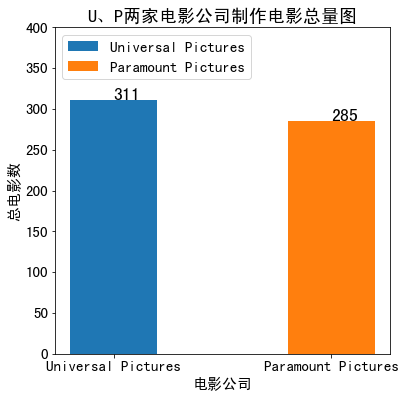

In [32]:
# 两家公司的作品数量对比
U_num = len(Udf)
P_num = len(Pdf)
f = [{'Universal Pictures' : U_num},
     {'Paramount Pictures' : P_num}]
plt.figure(figsize=(6,6))
plt.bar('Universal Pictures', U_num, width = 0.4, label='Universal Pictures')
plt.bar('Paramount Pictures', P_num, width = 0.4, label='Paramount Pictures')
plt.xlabel('电影公司', fontsize=15)
plt.ylabel('总电影数', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0, 400))
plt.legend(loc=2, fontsize=15)  
plt.text(0,311,'311',fontsize=18,color='black')
plt.text(1,285,'285',fontsize=18,color='black')
plt.title('U、P两家电影公司制作电影总量图', fontsize=18)
plt.show()

In [33]:
# 将两家公司数据集的发行时间用xxxx年表示
Udf = Udf.groupby(['release_date']).sum().to_period('Y')
Pdf = Pdf.groupby(['release_date']).sum().to_period('Y')
Pdf.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 282 entries, 1927 to 2016
Freq: A-DEC
Data columns (total 6 columns):
budget          282 non-null float64
popularity      282 non-null float64
revenue         282 non-null float64
runtime         282 non-null float64
vote_average    282 non-null float64
vote_count      282 non-null float64
dtypes: float64(6)
memory usage: 15.4 KB


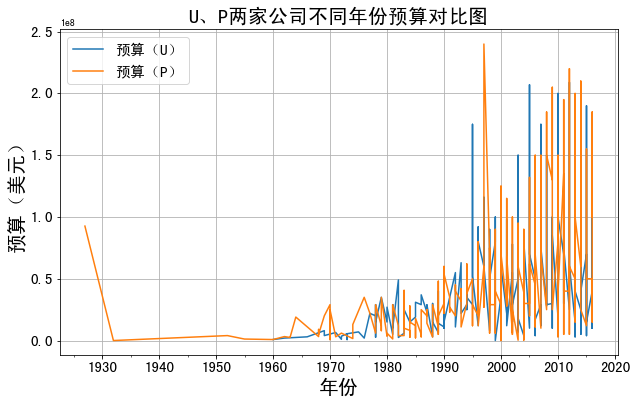

In [34]:
# 两家公司的预算情况
ax1 = Udf.plot(x=Udf.index, y='budget', label='预算（U）', figsize=(10, 6))
Pdf.plot(ax=ax1, x=Pdf.index, y='budget', label='预算（P）', figsize=(10, 6))
plt.title('U、P两家公司不同年份预算对比图', fontsize=20)
plt.legend(loc=2, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('年份', fontsize=20)
plt.ylabel('预算（美元）', fontsize=20)
plt.grid(True)
plt.show()

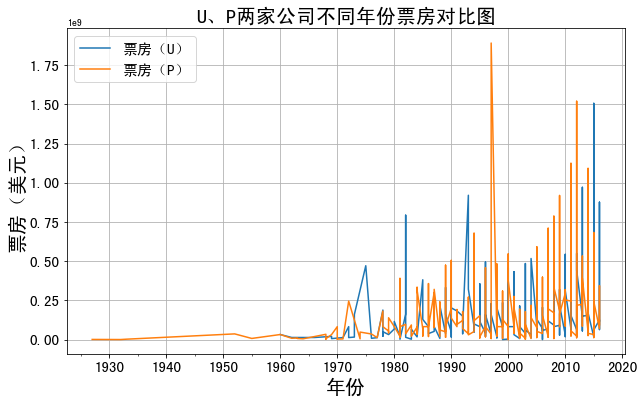

In [35]:
# 两家公司的票房情况
ax2 = Udf.plot(x=Udf.index, y='revenue', label='票房（U）', figsize=(10, 6))
Pdf.plot(ax=ax2, x=Pdf.index, y='revenue', label='票房（P）', figsize=(10, 6))
plt.title('U、P两家公司不同年份票房对比图', fontsize=20)
plt.legend(loc=2, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('年份', fontsize=20)
plt.ylabel('票房（美元）', fontsize=20)
plt.grid(True)
plt.show()

# 五、影响电影票房以及评分的因素

In [36]:
# 查看各因素与票房的相关性
df.corr()['revenue']

movie_id       -0.003872
budget          0.694854
id             -0.003872
popularity      0.599414
revenue         1.000000
runtime         0.219246
vote_average    0.158375
vote_count      0.746252
Name: revenue, dtype: float64

In [37]:
# 查看各因素与评分的相关性
df.corr()['vote_average']

movie_id       -0.141647
budget          0.015704
id             -0.141647
popularity      0.283164
revenue         0.158375
runtime         0.355119
vote_average    1.000000
vote_count      0.340800
Name: vote_average, dtype: float64

## 5.1 各主要因素对票房的影响

In [38]:
# 按年统计信息
df_y = df.resample('Y').sum().to_period('Y')
df_y.describe()

,movie_id,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.020000e+02,1.020000e+02,1.020000e+02,102.000000,1.020000e+02,102.000000,102.000000,102.000000
mean,2.688095e+06,1.662748e+09,2.688095e+06,1012.034507,5.023784e+09,5068.228310,290.573464,32914.010443
std,9.204811e+06,3.033347e+09,9.204811e+06,1841.414556,8.838005e+09,8170.275291,469.675226,61719.745764
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.544325e+04,3.814089e+06,2.544325e+04,8.899608,1.867774e+07,198.250000,12.700000,108.750000
50%,9.538550e+04,5.234359e+07,9.538550e+04,120.960566,3.679422e+08,948.000000,51.650000,2804.500000
75%,6.182052e+05,8.513731e+08,6.182052e+05,692.990075,3.900786e+09,3600.500000,209.450000,22921.250000
max,5.982599e+07,9.542231e+09,5.982599e+07,8920.269880,3.193688e+10,25896.000000,1510.386880,264473.085173


In [39]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 102 entries, 1916 to 2017
Freq: A-DEC
Data columns (total 8 columns):
movie_id        102 non-null int64
budget          102 non-null float64
id              102 non-null int64
popularity      102 non-null float64
revenue         102 non-null float64
runtime         102 non-null float64
vote_average    102 non-null float64
vote_count      102 non-null float64
dtypes: float64(6), int64(2)
memory usage: 7.2 KB


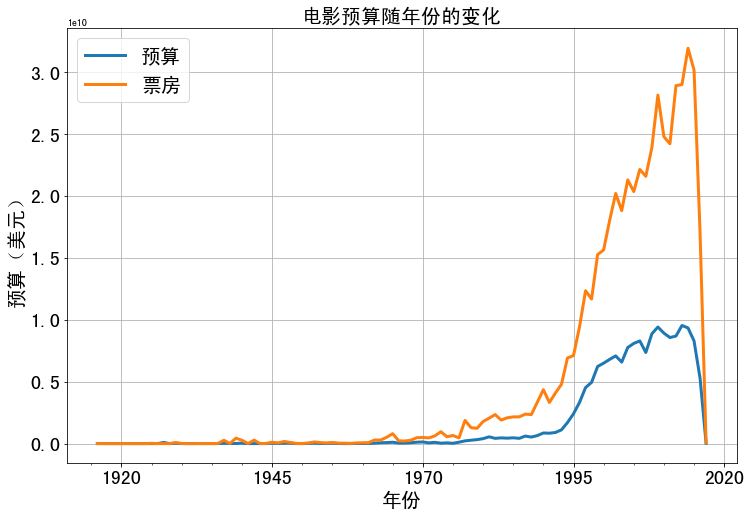

In [40]:
# 预算随年代变化
ax1 = df_y.plot(x=df_y.index, y='budget', figsize=(12, 8), fontsize=20, label='预算',linewidth=3)
df_y.plot(ax=ax1, x=df_y.index, y='revenue', figsize=(12, 8), fontsize=20, label='票房', linewidth=3)
plt.title('电影预算随年份的变化', fontsize=20)
plt.xlabel('年份', fontsize=20)
plt.ylabel('预算（美元）', fontsize=20)
plt.legend(loc=2, fontsize=20)
plt.grid(True)
plt.show()

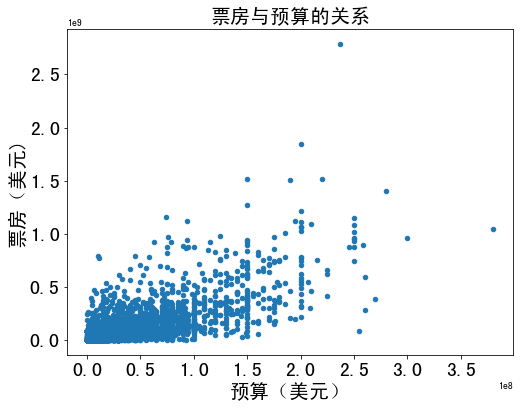

In [41]:
# 票房与预算的关系
df.plot(kind='scatter', x='budget', y='revenue', figsize=(8, 6), fontsize=20)
plt.xlabel('预算（美元）', fontsize=20)
plt.ylabel('票房（美元)', fontsize=20)
plt.title('票房与预算的关系', fontsize=20)
plt.show()

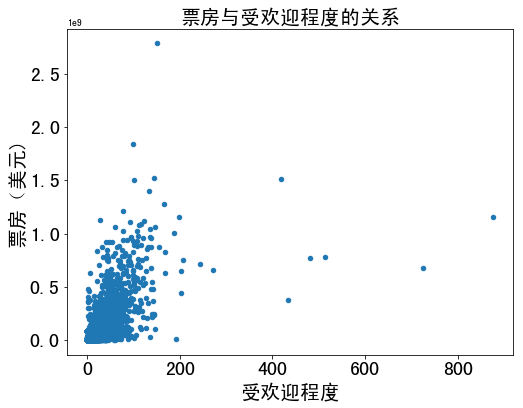

In [42]:
# 票房与受欢迎程度的关系
df.plot(kind='scatter', x='popularity', y='revenue', figsize=(8, 6), fontsize=20)
plt.xlabel('受欢迎程度', fontsize=20)
plt.ylabel('票房（美元)', fontsize=20)
plt.title('票房与受欢迎程度的关系', fontsize=20)
plt.show()

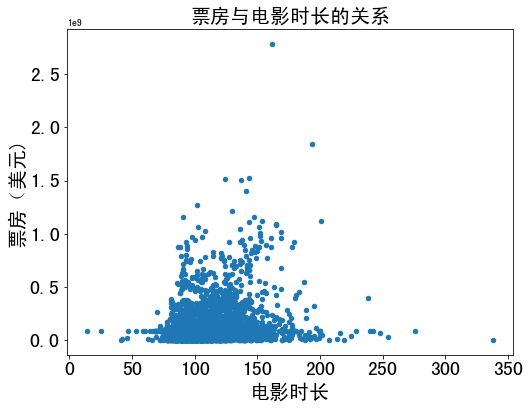

In [43]:
# 观众评分与电影时长的关系
df.plot(kind='scatter', x='runtime', y='revenue', figsize=(8, 6), fontsize=20)
plt.xlabel('电影时长', fontsize=20)
plt.ylabel('票房（美元)', fontsize=20)
plt.title('票房与电影时长的关系', fontsize=20)
plt.show()

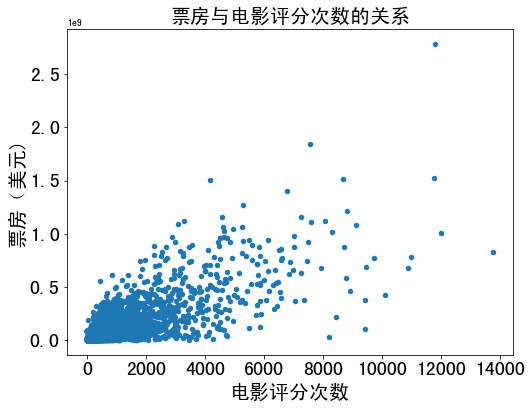

In [44]:
# 票房与电影评分次数的关系
df.plot(kind='scatter', x='vote_count', y='revenue', figsize=(8, 6), fontsize=20)
plt.xlabel('电影评分次数', fontsize=20)
plt.ylabel('票房（美元)', fontsize=20)
plt.title('票房与电影评分次数的关系', fontsize=20)
plt.show()

In [45]:
# 选取评分人数超过1000人的新子集
df_vote = df[df['vote_count']>100]
df_vote.describe()

,movie_id,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3211.000000,3.211000e+03,3211.000000,3211.000000,3.211000e+03,3211.000000,3211.000000,3211.000000
mean,51052.770476,4.272553e+07,51052.770476,30.419670,1.314305e+08,109.782857,6.351106,1027.436644
std,84440.955773,4.351095e+07,84440.955773,35.637937,1.825387e+08,20.109515,0.827029,1394.626589
min,5.000000,1.000000e+00,5.000000,0.001186,1.200000e+01,25.000000,2.900000,101.000000
25%,4663.000000,1.500000e+07,4663.000000,12.861090,3.295463e+07,96.000000,5.800000,248.500000
50%,10992.000000,2.905109e+07,10992.000000,21.436682,8.227777e+07,106.000000,6.400000,527.000000
75%,51985.000000,5.500000e+07,51985.000000,37.752812,1.478628e+08,120.000000,6.900000,1165.000000
max,459488.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,248.000000,8.500000,13752.000000


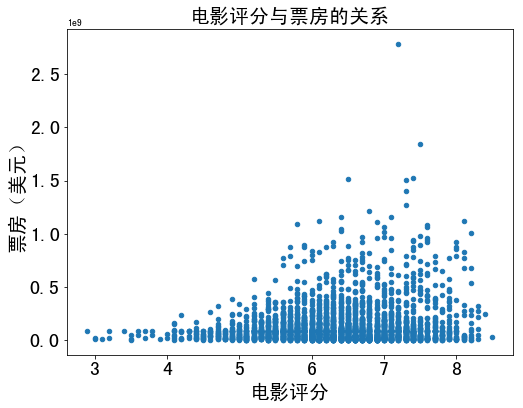

In [46]:
# 观众评分与电影票房的关系
df_vote.plot(kind='scatter', x='vote_average', y='revenue', fontsize=20, figsize=(8, 6))
plt.xlabel('电影评分', fontsize=20)
plt.ylabel('票房（美元）', fontsize=20)
plt.title('电影评分与票房的关系', fontsize=20)
plt.show()

# 5.2 各主要因素对电影评分的影响 

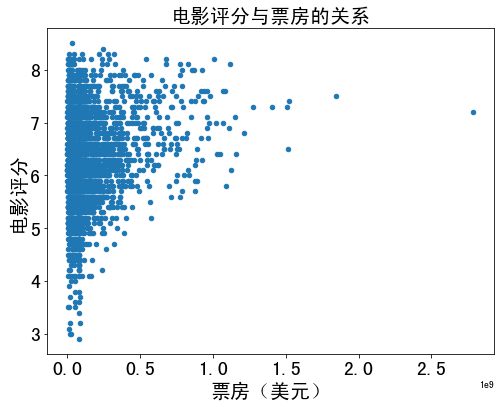

In [47]:
# 观众评分与电影i票房的关系
df_vote.plot(kind='scatter', x='revenue', y='vote_average', fontsize=20, figsize=(8, 6))
plt.xlabel('票房（美元）', fontsize=20)
plt.ylabel('电影评分', fontsize=20)
plt.title('电影评分与票房的关系', fontsize=20)
plt.show()

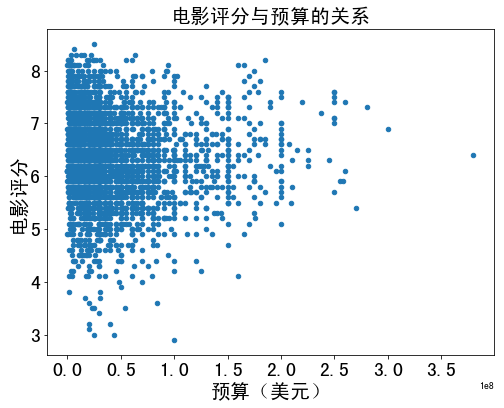

In [48]:
# 观众评分与电影预算的关系
df_vote.plot(kind='scatter', x='budget', y='vote_average', fontsize=20, figsize=(8, 6))
plt.xlabel('预算（美元）', fontsize=20)
plt.ylabel('电影评分', fontsize=20)
plt.title('电影评分与预算的关系', fontsize=20)
plt.show()

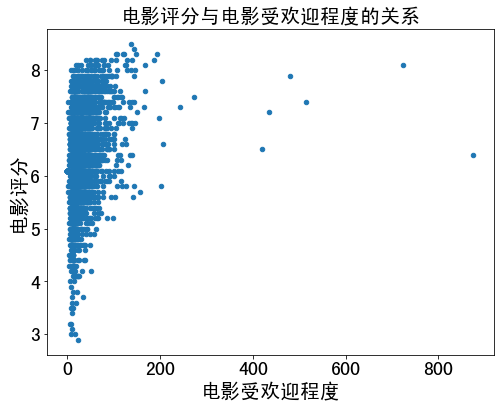

In [49]:
# 观众评分与电影受欢迎程度的关系
df_vote.plot(kind='scatter', x='popularity', y='vote_average', fontsize=20, figsize=(8, 6))
plt.xlabel('电影受欢迎程度', fontsize=20)
plt.ylabel('电影评分', fontsize=20)
plt.title('电影评分与电影受欢迎程度的关系', fontsize=20)
plt.show()

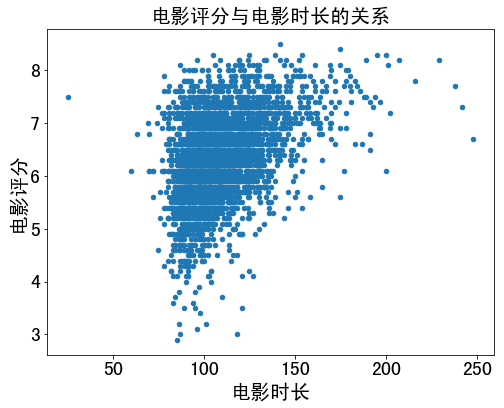

In [50]:
# 观众评分与电影时长的关系
df_vote.plot(kind='scatter', x='runtime', y='vote_average', fontsize=20, figsize=(8, 6))
plt.xlabel('电影时长', fontsize=20)
plt.ylabel('电影评分', fontsize=20)
plt.title('电影评分与电影时长的关系', fontsize=20)
plt.show()

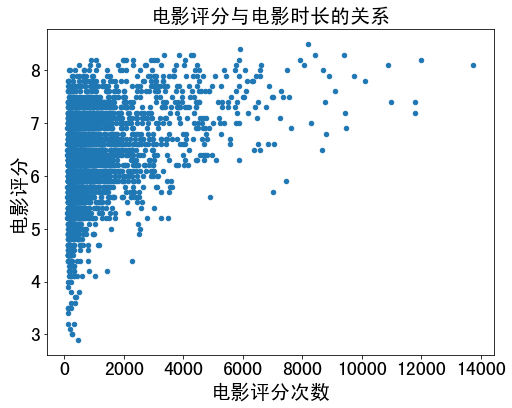

In [51]:
# 观众评分与电影评论次数的关系
df_vote.plot(kind='scatter', x='vote_count', y='vote_average', fontsize=20, figsize=(8, 6))
plt.xlabel('电影评分次数', fontsize=20)
plt.ylabel('电影评分', fontsize=20)
plt.title('电影评分与电影时长的关系', fontsize=20)
plt.show()

# 六、总结